In [11]:
merged_data['Day_of_Week'] = merged_data['date'].dt.dayofweek
merged_data['Month'] = merged_data['date'].dt.month


In [12]:
merged_data.to_csv('azure_usage_cleaned.csv', index=False)

In [13]:
from google.colab import files
files.download('azure_usage_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merged_df = pd.read_csv('azure_usage_cleaned.csv')
merged_df['date'] = pd.to_datetime(merged_df['date'])


In [15]:
# Basic info
print(merged_df.info())

# Basic statistics
print(merged_df.describe())

# Check for missing values
print(merged_df.isnull().sum())

# Preview first 5 rows
print(merged_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1080 non-null   datetime64[ns]
 1   region               1080 non-null   object        
 2   resource_type        1080 non-null   object        
 3   usage_cpu            1080 non-null   int64         
 4   usage_storage        1080 non-null   int64         
 5   users_active         1080 non-null   int64         
 6   economic_index       1080 non-null   float64       
 7   cloud_market_demand  1080 non-null   float64       
 8   holiday              1080 non-null   int64         
 9   Day_of_Week          1080 non-null   int64         
 10  Month                1080 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 92.9+ KB
None
                      date    usage_cpu  usage_storage  users_act

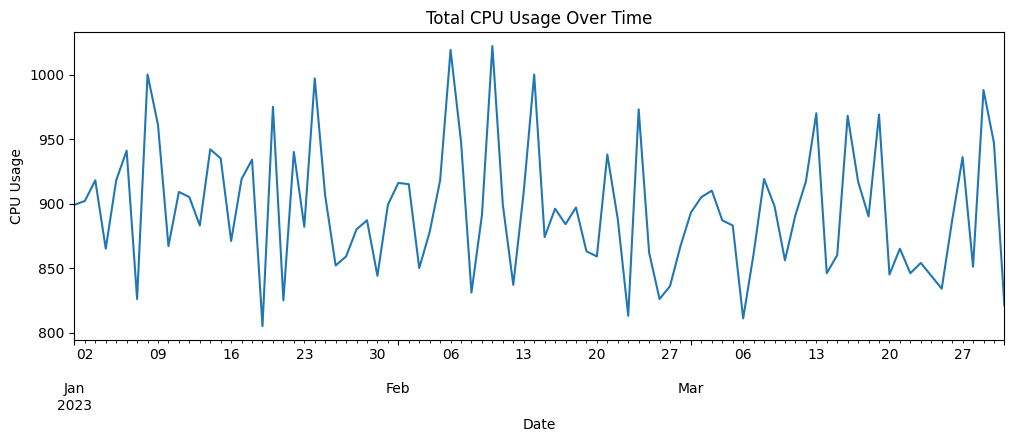

In [16]:
merged_df.groupby('date')['usage_cpu'].sum().plot(figsize=(12,4))
plt.title("Total CPU Usage Over Time")
plt.xlabel("Date")
plt.ylabel("CPU Usage")
plt.show()


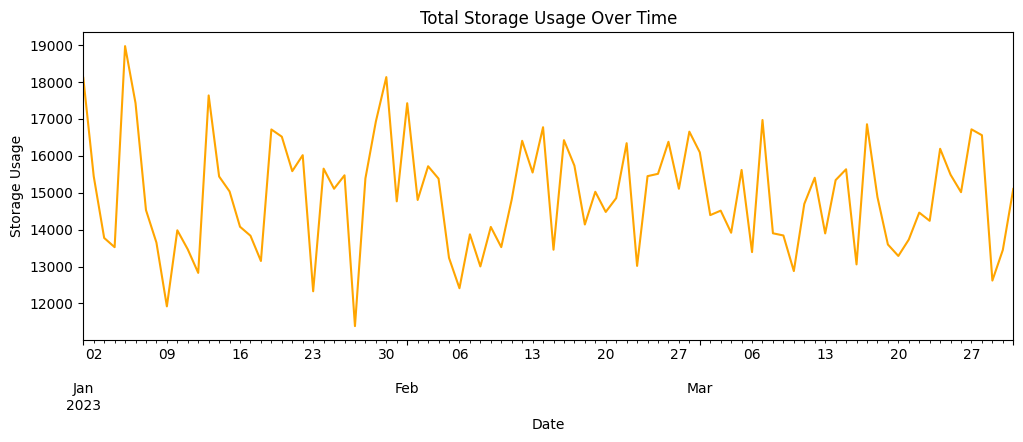

In [17]:
merged_df.groupby('date')['usage_storage'].sum().plot(figsize=(12,4), color='orange')
plt.title("Total Storage Usage Over Time")
plt.xlabel("Date")
plt.ylabel("Storage Usage")
plt.show()


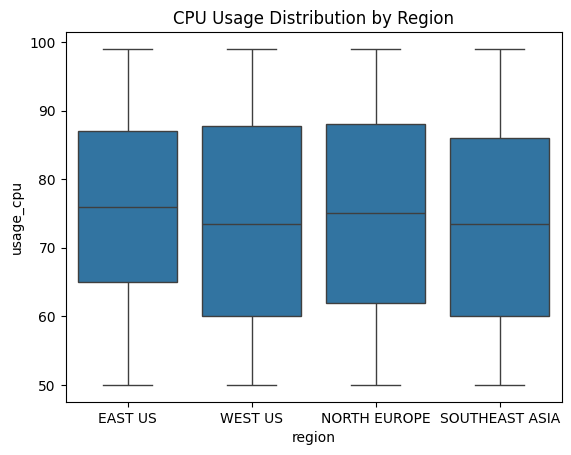

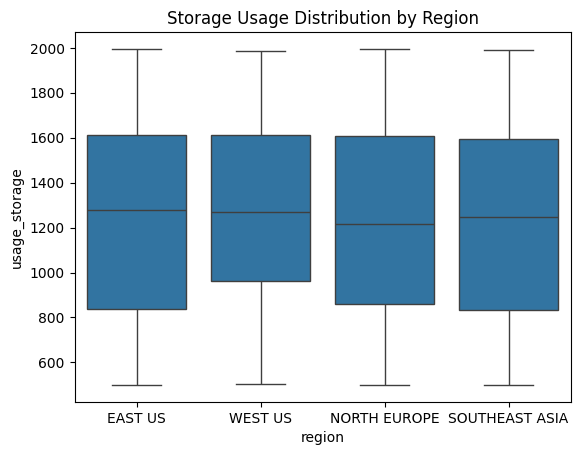

In [18]:
sns.boxplot(x='region', y='usage_cpu', data=merged_df)
plt.title("CPU Usage Distribution by Region")
plt.show()

sns.boxplot(x='region', y='usage_storage', data=merged_df)
plt.title("Storage Usage Distribution by Region")
plt.show()


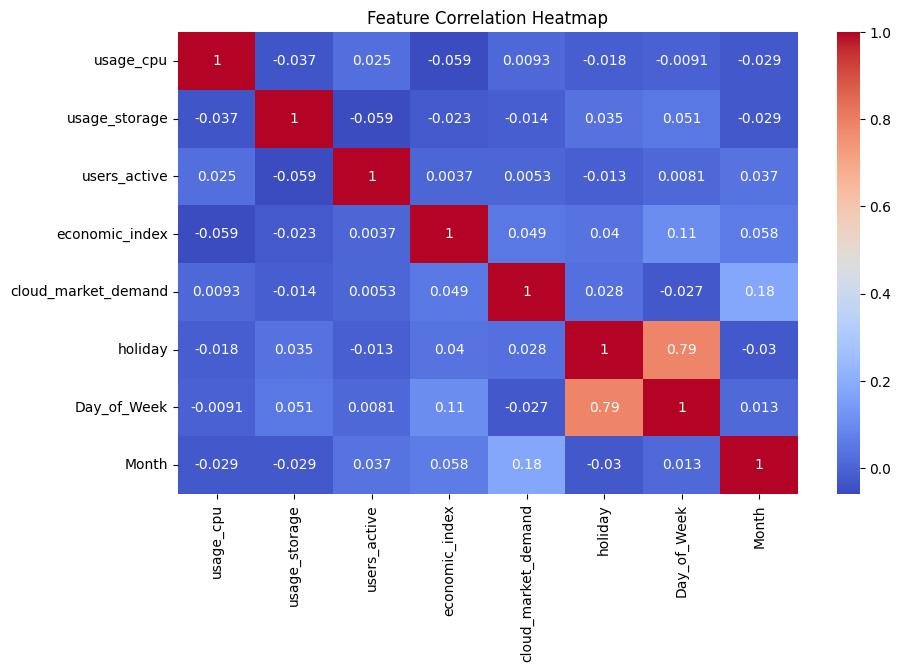

In [19]:
plt.figure(figsize=(10,6))
# Select only numeric columns for correlation calculation
numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

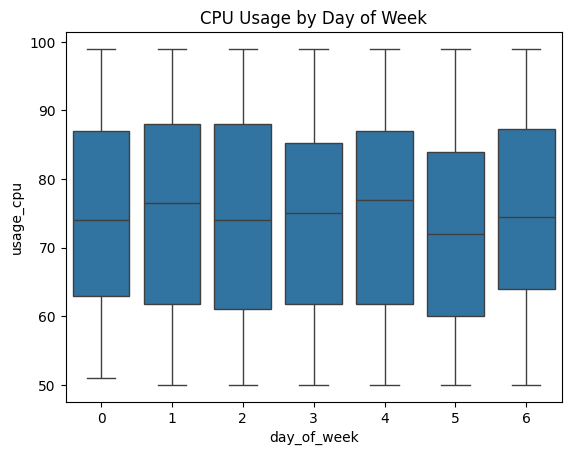

In [20]:
merged_df['day_of_week'] = merged_df['date'].dt.dayofweek
sns.boxplot(x='day_of_week', y='usage_cpu', data=merged_df)
plt.title("CPU Usage by Day of Week")
plt.show()

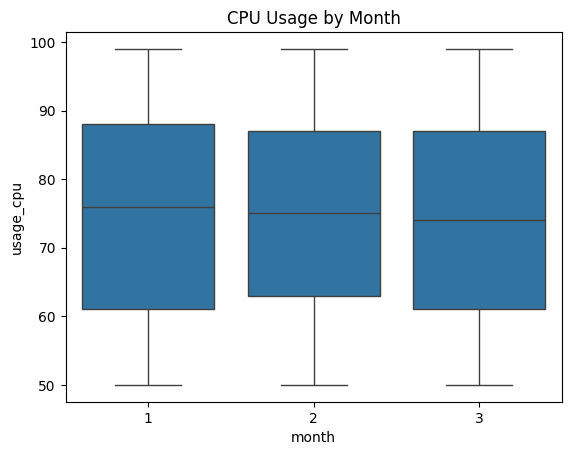

In [21]:
merged_df['month'] = merged_df['date'].dt.month
sns.boxplot(x='month', y='usage_cpu', data=merged_df)
plt.title("CPU Usage by Month")
plt.show()
